### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.


In [58]:
### importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [47]:
## Loading dataset
airline = pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [61]:
airline1 = airline.drop(["ID#", 'Award?'],axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [62]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [63]:
### Normalising data 
airline1_norm= pd.DataFrame(normalize(airline1), columns=airline1.columns)
airline1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


In [68]:
# Using elbow graph to find optimum number of clusters (k value) from 
# k values range

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(airline1_norm)
    wcss.append(kmeans.inertia_)

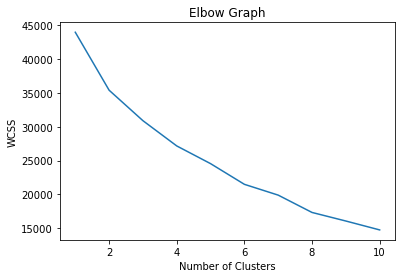

In [67]:
# Plot k values range vs WCSS to get elbow graph for choosing K

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Build Cluster algorithm using k=4

In [69]:
clusters4 = KMeans(4,random_state=30).fit(airline1_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [71]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [79]:
## Assign clusters to the data set

airline4= airline1.copy()
airline4['clusters4id'] =clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,3
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,3
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [80]:
# compute the centroids for k=4 clusters with 11 variables
clusters4.cluster_centers_

array([[9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01],
       [5.23653977e-01, 2.37603195e-03, 9.13653057e-05, 4.56081255e-05,
        4.45095232e-05, 7.97866701e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123101e-05, 1.31443995e-01],
       [6.28081329e-01, 9.30359261e-04, 2.06331618e-04, 2.06128768e-04,
        2.05879952e-04, 1.23980626e-01, 4.76413720e-04, 6.66146536e-03,
        2.24385618e-05, 6.89106613e-01],
       [8.99048679e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262676e-03,
        2.24052644e-05, 8.50654942e-02]])

In [81]:
airline4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560
2,2,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669
3,3,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211


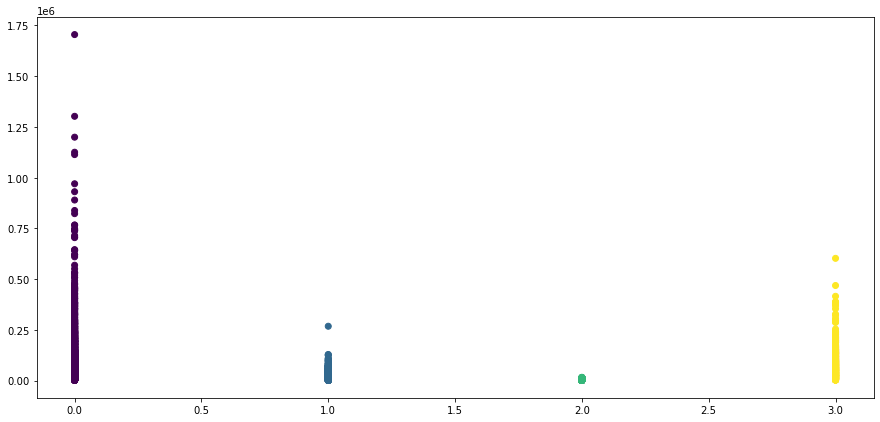

In [82]:
## Plotting clusters

plt.figure(figsize=(15,7))
plt.scatter(airline4['clusters4id'], airline4['Balance'],c=clusters4.labels_)

### Build cluster algorithm using k=5

In [83]:
# cluster algorithm using k=5
clusters5=KMeans(5,random_state=30).fit(airline1_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [84]:
clusters5.labels_

array([1, 2, 1, ..., 3, 1, 2])

In [86]:
## Assign clusters to the data set

airline5 = airline1.copy()
airline5['clusters5id'] = clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,3
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,3
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [87]:
## compute the centroids for K=5 with 11 variables

clusters5.cluster_centers_

array([[ 5.14759000e-01,  2.45703304e-03,  9.55752983e-05,
         5.00781671e-05,  4.87710515e-05,  8.02358707e-01,
         5.20472069e-04,  1.80244812e-02,  6.06430624e-05,
         1.36539354e-01],
       [ 9.87581994e-01,  3.39051837e-03,  3.51053916e-05,
         3.03791237e-05,  3.02652033e-05,  9.01709733e-02,
         1.53701634e-04,  6.66013521e-03,  2.09767345e-05,
         7.53291184e-02],
       [ 8.93103634e-01,  4.45303855e-03,  1.23796982e-04,
         1.23612826e-04,  1.23612826e-04,  7.60122619e-02,
         2.95169039e-04,  6.30476784e-03,  2.07480658e-05,
         4.07515394e-01],
       [ 8.91833807e-01,  2.00098101e-03,  5.80553279e-05,
         3.01489923e-05,  2.94377607e-05,  4.20637046e-01,
         4.04859493e-04,  7.68892417e-03,  2.27011475e-05,
         8.30834166e-02],
       [ 4.14644793e-01, -4.33680869e-19,  2.28611981e-04,
         2.27627268e-04,  2.27627268e-04,  1.50766684e-01,
         5.97513437e-04,  7.35401501e-03,  2.84888390e-05,
         8.

In [89]:
## Group data by clusters (K=5)

airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841
1,1,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060
2,2,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309
3,3,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431
4,4,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225


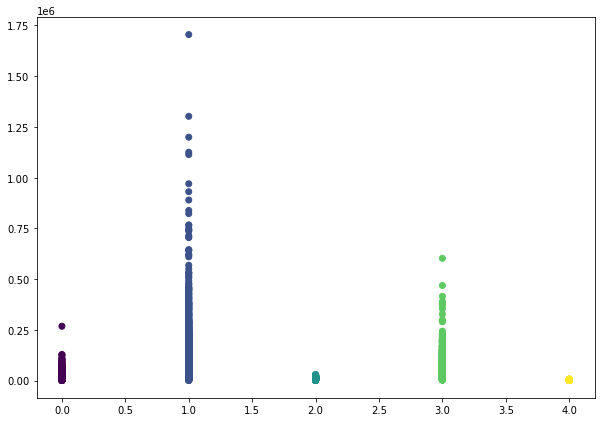

In [92]:
### Plot clusters

plt.figure(figsize=(10,7))
plt.scatter(airline5['clusters5id'], airline5['Balance'],c=clusters5.labels_)